In [67]:
# Loading matrices
import os
import glob

folder = 'D:\\adjacency_matrices_NetworkToolbox_INF\\'
all_matrices = glob.glob(folder + 'sub*_adj_*')

In [141]:
# Storing matrices into 3d numpy array
import pandas as pd
import numpy as np

all_matrices = all_matrices[0:10] # for testing purposes
X = np.zeros([57, 57, len(all_matrices)])

for i, matrix in enumerate(all_matrices):
    X[:,:,i] = np.array(pd.read_csv(matrix).iloc[: , 1:])
    np.fill_diagonal(X[:,:,i], 0)


In [147]:
from sklearn.cluster import KMeans

# Reshaping 3d array into 2d array of size Nsamples X N features
nx, ny, nsamples = X.shape
Xtrain = X.reshape((nsamples, nx*ny)).T

kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(Xtrain)


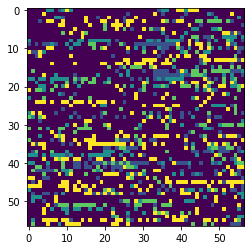

In [148]:
import matplotlib.pyplot as plt

plt.imshow(kmeans.reshape([57,57]))
